# New Section

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In[2]:

In [28]:
df=pd.read_csv('/content/NetflixOriginals.csv', encoding='ISO-8859-1')

In[4]:

In [29]:
df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)[0:1]
langbyruntime = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()

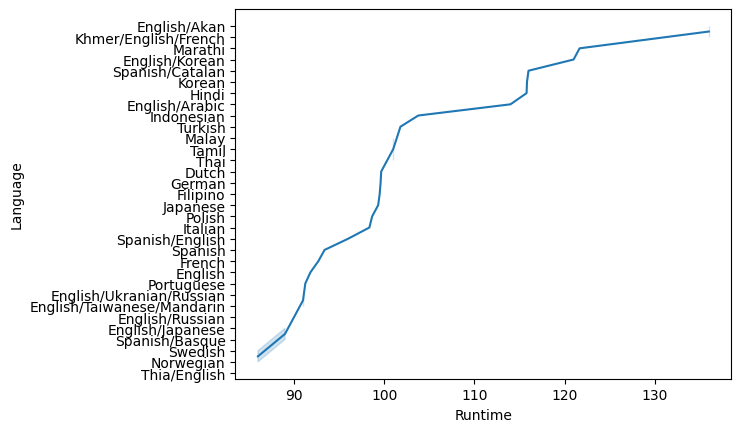

In [30]:
sns.lineplot(y=langbyruntime["Language"], x=langbyruntime.loc[(langbyruntime["Runtime"] >= 86)]["Runtime"])
plt.show()

In[5]:

In [31]:
df["Date"] = pd.to_datetime(df.Premiere)

In [32]:
df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
15,After the Raid,Documentary,"December 19, 2019",25,4.3,Spanish,2019-12-19
20,"Hello Privilege. It's Me, Chelsea",Documentary,"September 13, 2019",64,4.4,English,2019-09-13
30,After Maria,Documentary,"May 24, 2019",37,4.6,English/Spanish,2019-05-24
111,Ghosts of Sugar Land,Documentary,October 16. 2019,21,5.5,English,2019-10-16


In [33]:
docum = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()
docum["Title"].value_counts()

Enter the Anime                      1
After the Raid                       1
Hello Privilege. It's Me, Chelsea    1
After Maria                          1
Ghosts of Sugar Land                 1
Name: Title, dtype: int64

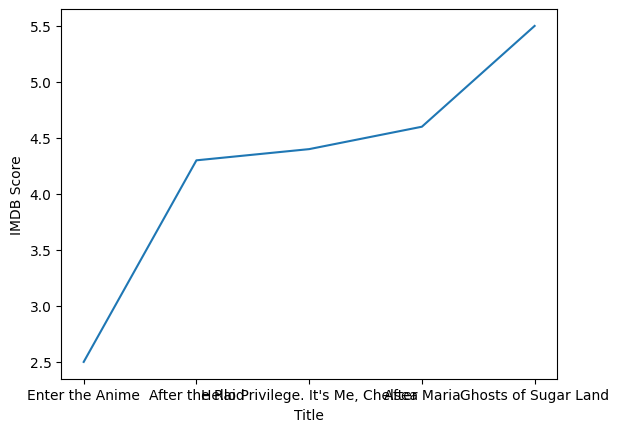

In [34]:
sns.lineplot(x=docum["Title"], y=docum["IMDB Score"])
plt.show()

In[6]:

In [35]:
df.loc[(df["Language"] == "English")]
dfeng = df.loc[(df["Language"] == "English")]
dfeng.sort_values(by="IMDB Score", ascending=False)[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04


In[7]:

In [36]:
df.loc[(df["Language"] == "Hindi")].agg({"Runtime": "mean"})

Runtime    115.787879
dtype: float64

In[15]:

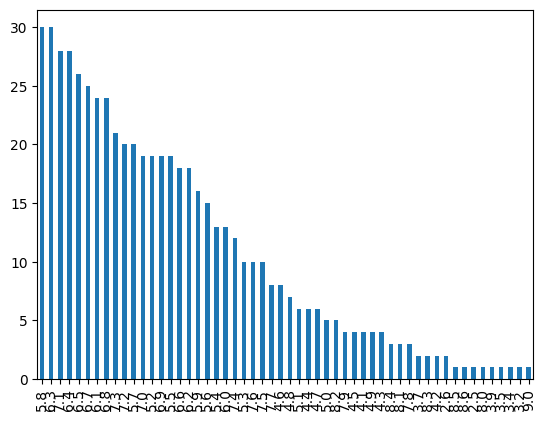

In [37]:
df["Genre"].unique()
df["Runtime"].value_counts()
#df["Premiere "].nunique()
df["IMDB Score"].value_counts().plot(kind='bar')
plt.show()

In[16]:

In [38]:
df["Language"].value_counts(sort=True)[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In[17]:

In [39]:
df.sort_values(by="IMDB Score", ascending=False)[0:10]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


In[18]:

In [40]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


In[19]:

<Axes: title={'center': 'Correlation Matrix'}>

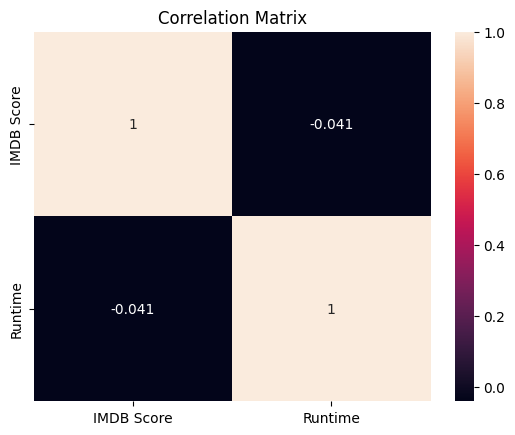

In [41]:
plt.title('Correlation Matrix')
sns.heatmap(df[['IMDB Score', 'Runtime']].corr(), annot=True)

In[20]:

In [42]:
IMDB_Score = df['IMDB Score']
Runtime = df['Runtime']

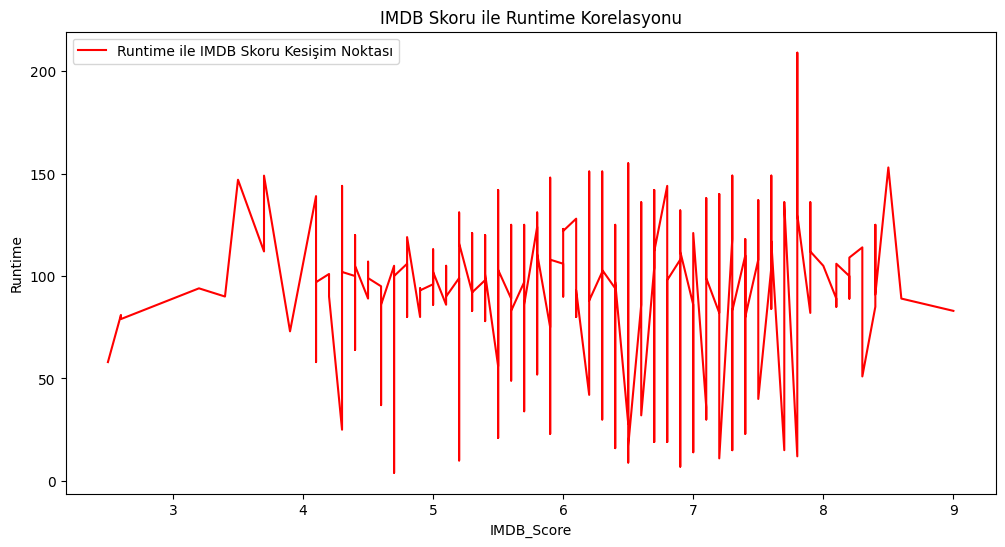

In [43]:
plt.figure(figsize=(12,6))
plt.plot(IMDB_Score, Runtime, label='Runtime ile IMDB Skoru Kesişim Noktası', color='r')
plt.xlabel('IMDB_Score')
plt.ylabel('Runtime')
plt.title('IMDB Skoru ile Runtime Korelasyonu')
plt.legend()
plt.show()

In[21]:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    object        
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Date        584 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.1+ KB


In[22]:

In [45]:
df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

In[23]:

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    object        
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Date        584 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.1+ KB


Text(0.5, 1.0, 'IMDB Score')

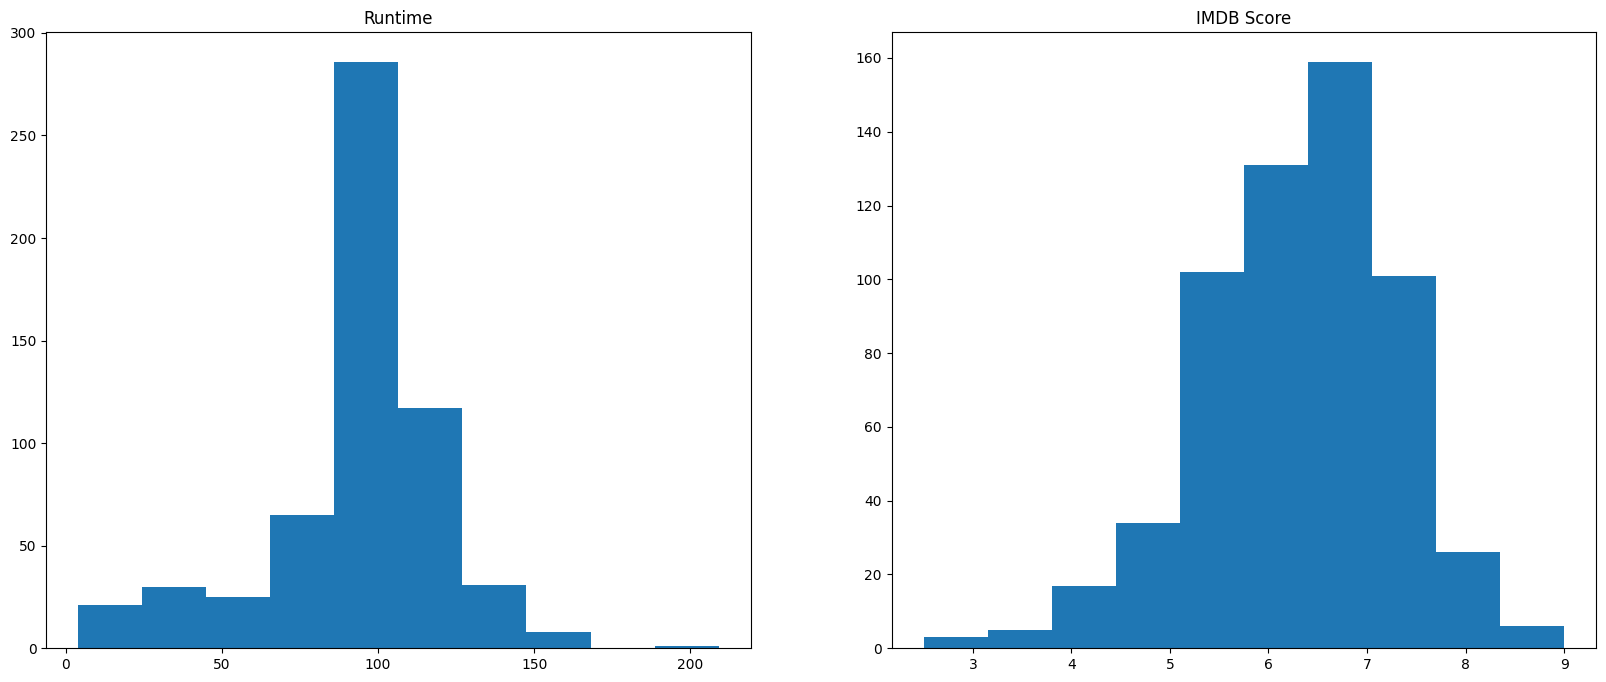

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

ax1.hist(df["Runtime"])
ax1.set_title("Runtime")

ax2.hist(df["IMDB Score"])
ax2.set_title("IMDB Score")

In [48]:

plt.show()

In [49]:
def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    return df[(df[var] < lower_t) | (df[var] > upper_t)]

In [50]:
runtime_out = iqr(df, "Runtime")
IMDB_Score_out = iqr(df, "IMDB Score")

print("Number of outlier values of Runtime: "+str(len(runtime_out))+
      " Number of outlier values of IMDB Score: "+str(len(IMDB_Score_out)))

Number of outlier values of Runtime: 75 Number of outlier values of IMDB Score: 9


In[ ]:

In [51]:
def assign_numbers_to_unique_names(df, column_name):
    Genre= df[column_name].unique()
    name_to_number = {name: i+1 for i, name in enumerate(Genre)}
    df['Genre rating'] = df[column_name].map(name_to_number)
    return df
column_name = 'Genre'
df = assign_numbers_to_unique_names(df, column_name)
bins = [0, 22, 44, 66, 88,114]
labels = [1, 2, 3,4,5]
df['Genre rating'] = pd.cut(df['Genre rating'], bins=bins, labels=labels)

print(df)

                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  \
0       August 5, 2019    

In [52]:
def assign_numbers_to_unique_names(df, column_name):
    Genre= df[column_name].unique()
    name_to_number = {name: i+1 for i, name in enumerate(Genre)}
    df['Language rating'] = df[column_name].map(name_to_number)
    return df
column_name = 'Language'

df = assign_numbers_to_unique_names(df, column_name)
bins = [0, 4, 9, 14, 19,22]
labels = [1, 2, 3,4,5]
df['Language rating'] = pd.cut(df['Language rating'], bins=bins, labels=labels)
print(df)

                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  \
0       August 5, 2019    

In [53]:
bins = [0, 30, 60, 90, 120,300]
labels = [1, 2, 3,4,5]
df['Runtime rating'] = pd.cut(df['Runtime'], bins=bins, labels=labels)
df= df.dropna()
df= df[~df['Language'].str.contains('/')]
print(df)

                                          Title                  Genre  \
1                                   Dark Forces               Thriller   
2                                       The App  Science fiction/Drama   
3                                The Open House        Horror thriller   
4                                   Kaali Khuhi                Mystery   
5                                         Drive                 Action   
..                                          ...                    ...   
578  Ben Platt: Live from Radio City Music Hall           Concert Film   
579       Taylor Swift: Reputation Stadium Tour           Concert Film   
581                     Springsteen on Broadway           One-man show   
582   Emicida: AmarElo - It's All For Yesterday            Documentary   
583    David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score    Language       Date  \
1      August 21, 2020       81         2

In [54]:
X = df[['Runtime rating', 'Language rating', 'Genre rating']]
y = df['IMDB Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (389, 3)
X_test shape: (168, 3)
y_train shape: (389,)
y_test shape: (168,)


In [55]:
model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R squared Error:{r_squared}")

Mean Squared Error: 1.0304366389027313
R squared Error:0.04623243203672045
